In [1]:
import os
import google.generativeai as genai

In [13]:
import requests
from PIL import Image
from io import BytesIO
from dotenv import load_dotenv
load_dotenv()
import glob

In [6]:
GOOGLE_AI_STUDIO = os.getenv('GOOGLE_AI_STUDIO')
GEMINI_PRO_VISION=os.getenv("GEMINI_PRO_VISION")

In [5]:
genai.configure(api_key=GOOGLE_AI_STUDIO)

In [7]:
vision_model=genai.GenerativeModel(GEMINI_PRO_VISION)

In [9]:
def load_image_from_url(url: str, new_size: tuple = None):
    """
    Loads an image from a given URL and optionally resizes it.

    :param url: The URL of the image to load.
    :type url: str
    :param new_size: The new size of the image, if resizing is desired. Defaults to None.
    :type new_size: tuple, optional
    :return: The loaded image, possibly resized.
    :rtype: PIL.Image.Image
    """
    # Send a GET request to the URL
    response = requests.get(url)

    # Raise an exception if the request was unsuccessful
    response.raise_for_status()

    # Open the image from the response content
    image = Image.open(BytesIO(response.content))

    # Resize the image only if a new size is provided
    if new_size is not None:
        image = image.resize(new_size)

    return image


def load_image_from_directory(file_path: str, new_size: tuple = None):
    # Open the image from the response content
    image = Image.open(file_path)

    # Resize the image only if a new size is provided
    if new_size is not None:
        image = image.resize(new_size)

    return image

c:\Nas.io\Gemini API


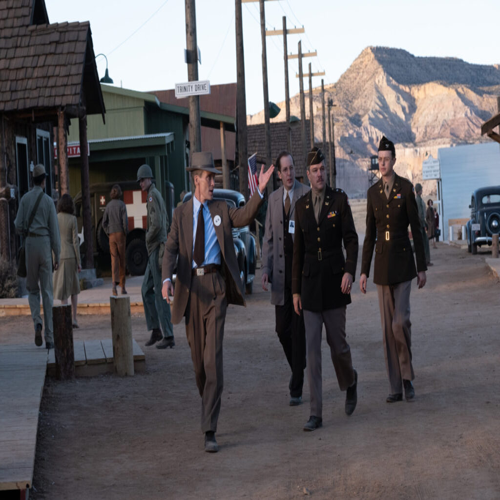

In [12]:
%cd ..
load_image_from_directory("./Artifacts/sample_images/Oppenheimer_Scene.jpeg", (500, 500))

In [15]:
%%time
image=load_image_from_directory("./Artifacts/sample_images/Oppenheimer_Scene.jpeg", (500, 500))
prompt_1 = "What is shown in the picture?"
prompt_2 = "What these people are doing?"
contents = [prompt_1, prompt_2, image]
responses = vision_model.generate_content(contents, stream=True)

print("\n---- Response ------")
for response in responses:
    print(response.text)


---- Response ------
 The image shows a scene from the movie "Oppenheimer". In the picture, you can see American theoretical physicist J. Robert Oppenheimer (Cillian Murphy
), along with Kenneth Nichols (Robert Downey Jr.) and General Leslie Groves (Matt Damon). They are walking and talking in a military base.
Wall time: 4.49 s


In [16]:
movie_posters = [load_image_from_directory(poster_path, (500, 500)) for poster_path in glob.glob("./Artifacts/sample_images/*_Poster.*")]


In [24]:
# Prepare the contents
prompt_1 = "Name the image posters of these movies and their release years."
prompt_2 = "What these movies have in common?"
prompt_3 = "What is the storyline of each of these movies?"
prompt_4 = "What makes these movies different from each other?"
prompt_5 = "Recommend one movie from this list that offers valuable life lessons, insights on survival in the world and also is more relevant to the real world?"
contents = [prompt_1, prompt_2, prompt_3, prompt_4, prompt_5] + movie_posters

responses = vision_model.generate_content(contents, stream=True)

print("\n-------Response--------")
for response in responses:
    print(response.text)


-------Response--------
 The image posters of these movies are:
1. Barbie 2023
2. Guardians of the Galaxy Vol. 3 20
23
3. Oppenheimer 2023
4. The Shawshank Redemption 1994
5. Toy Story 199
5

These movies have in common that they are all popular movies that were released in the last 30 years. They are all also very different movies, with different genres, storylines, and characters.

The storyline of each of these movies is as follows:
1. Barbie: The movie follows Barbie as she
 is kicked out of Barbieland for not being perfect enough and goes on an adventure in the real world.
2. Guardians of the Galaxy Vol. 3: The Guardians of the Galaxy must face a new threat when Adam Warlock, a powerful being created by the Sovereign, seeks to destroy them.
3. Oppenheimer: The movie follows J. Robert Oppenheimer, the director of the Manhattan Project, as he leads the team of scientists who developed the atomic bomb.
4. The Shawshank Redemption: The movie follows Andy Dufresne, a banker who is wro